![](image1.png)

In [1]:
ls

Baseball_project.ipynb  image1.png


In [1]:
### let's start with importing neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
## Loading the dataset

url ='https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv'
data = pd.read_csv(url)

In [3]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


#### The above code data.head() help see the first 5 records of our dataset

## From the header of our dataset we can see that the __Number of predict Win (W)__ which is 
## our target variable have continuous values, so we can assume that we our problem is a __Regression problem.__

In [4]:
data.shape

(30, 17)

### Here can see that our dataset have 30 records(rows) and 17 columns(attributes)

In [5]:
data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [6]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

### Form the above verification we can see that our dataset has no missing values and also no null values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


### We see from data.info() that our dataset has only two differents data types __int64__
### and __float64__ and only the column ERA has float64 dtypes

In [8]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


#### From the describe() method we can see ,how the data is distributed in each column.
#### we can see also the __count, the mean,the standar deviation__ of each column and also the 
#### __the minimum and the maximum and the quantitles__ of each column.

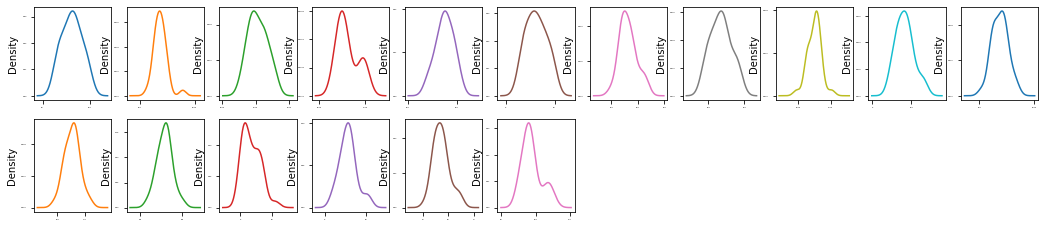

In [9]:
data.plot(kind='density',subplots=True,
          layout=(6,11),sharex=False,
          legend=False,fontsize='2',
          figsize =(18,12))
plt.show()

### From this density graph we can see that most the columns in the dataset have normal distribution format.

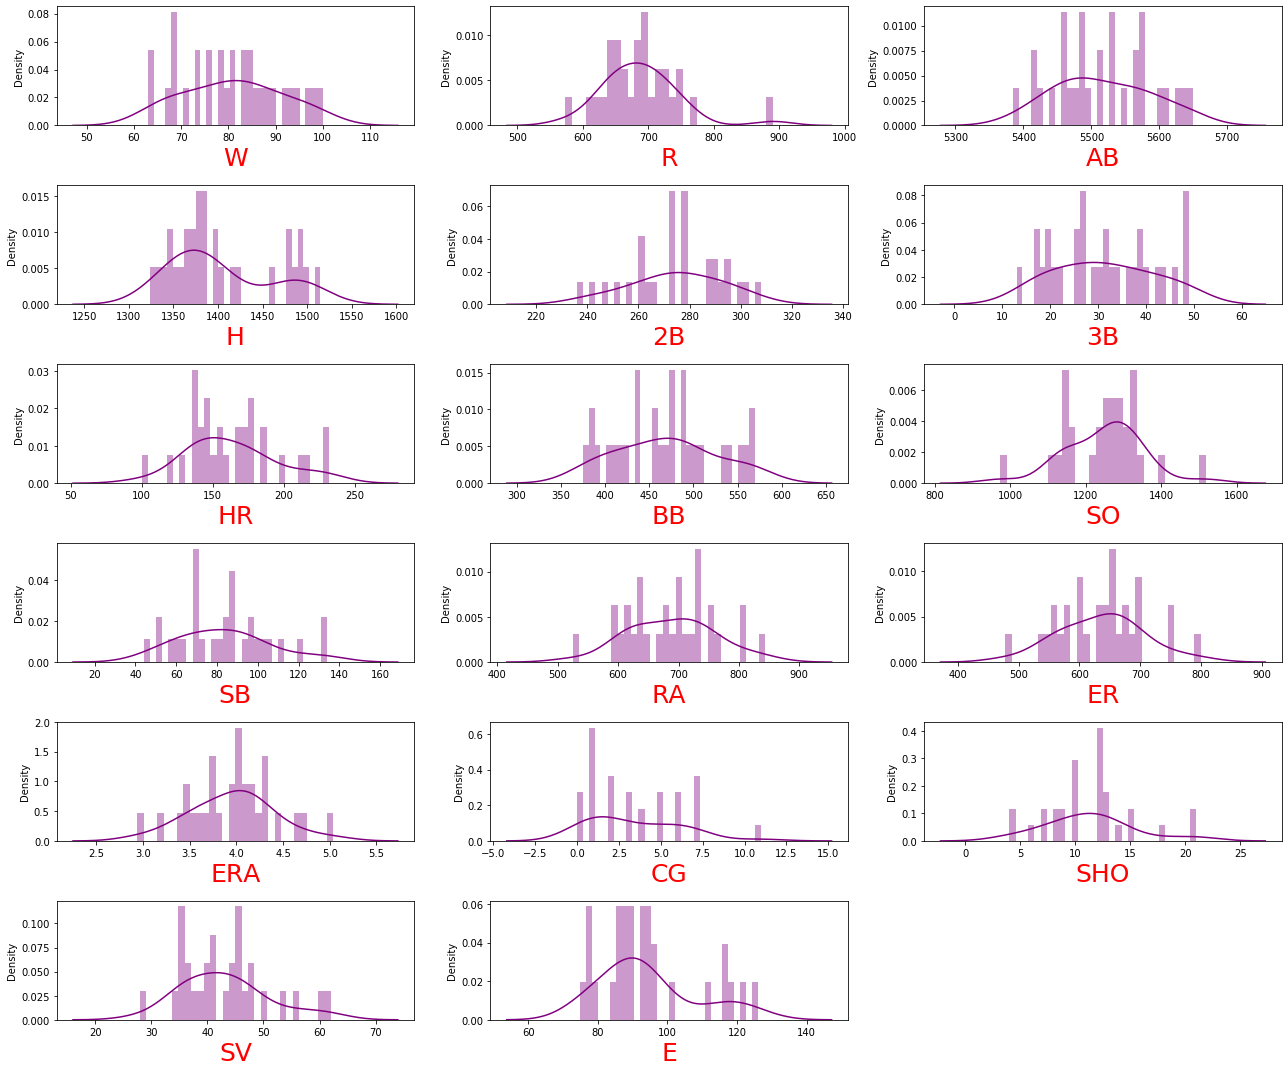

In [10]:
## plot a  distplot check the distribution

plt.figure(figsize=(18,15))
plotnumber = 1

for column in data:
    if plotnumber <= 17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(data[column],bins=30,color='purple')
        plt.xlabel(column,fontsize = 25,color='red')
    plotnumber+=1
plt.tight_layout()

### From distplot we can see that our data is not distributed normally for all the columns since  we can see __some skewness__
### form the columns "R",'H','So','SB','CG','SHO','ERA' and 'sv'.
### so we will plot boxplot and check for outliers.

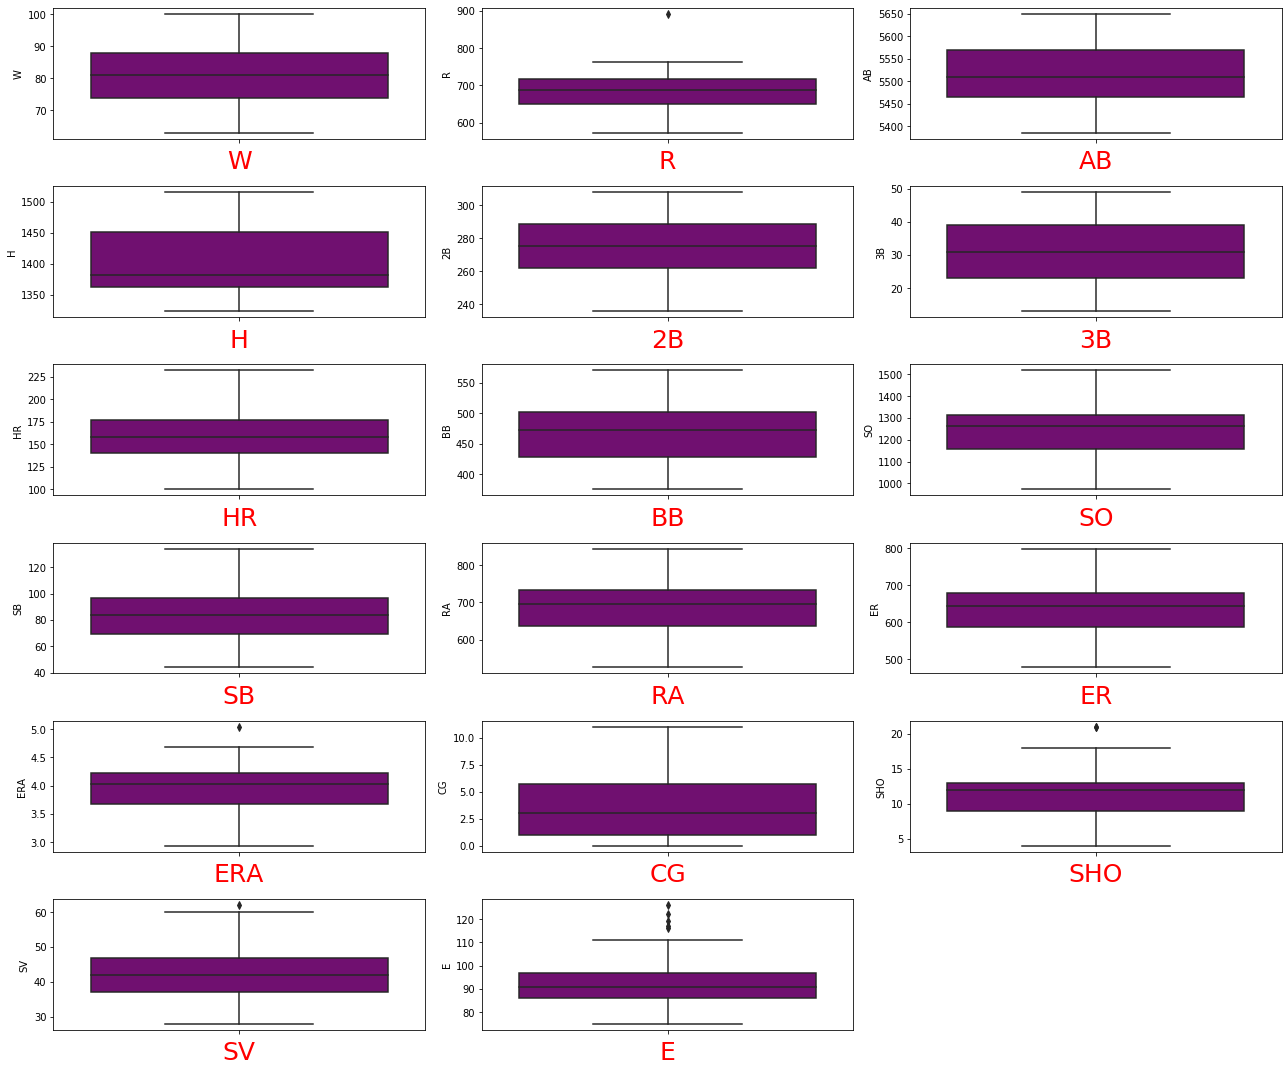

In [11]:

plt.figure(figsize=(18,15))
plotnumber = 1

for column in data:
    if plotnumber <= 17:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(y= data[column],color='purple',orient='h')
        plt.xlabel(column,fontsize = 25,color='red')
    plotnumber+=1
plt.tight_layout()

### From the above boxplot graph we can see outliers in some columns like:
### "R",'ERA','SV' , 'SHO',and 'E' let's remove those outliers using zscore.

## __Removing Outliers__

In [97]:
## Importing the libraries
from scipy.stats import zscore

In [98]:
z = np.abs(zscore(data))

In [99]:
new_data = data[(z<3).all(axis =1)]

In [100]:
## let's check the shape our the new data
new_data.shape

(29, 17)

#### The new_data have 29 rows and 17 columns.

### Again let's check if the outliers are removed or not.

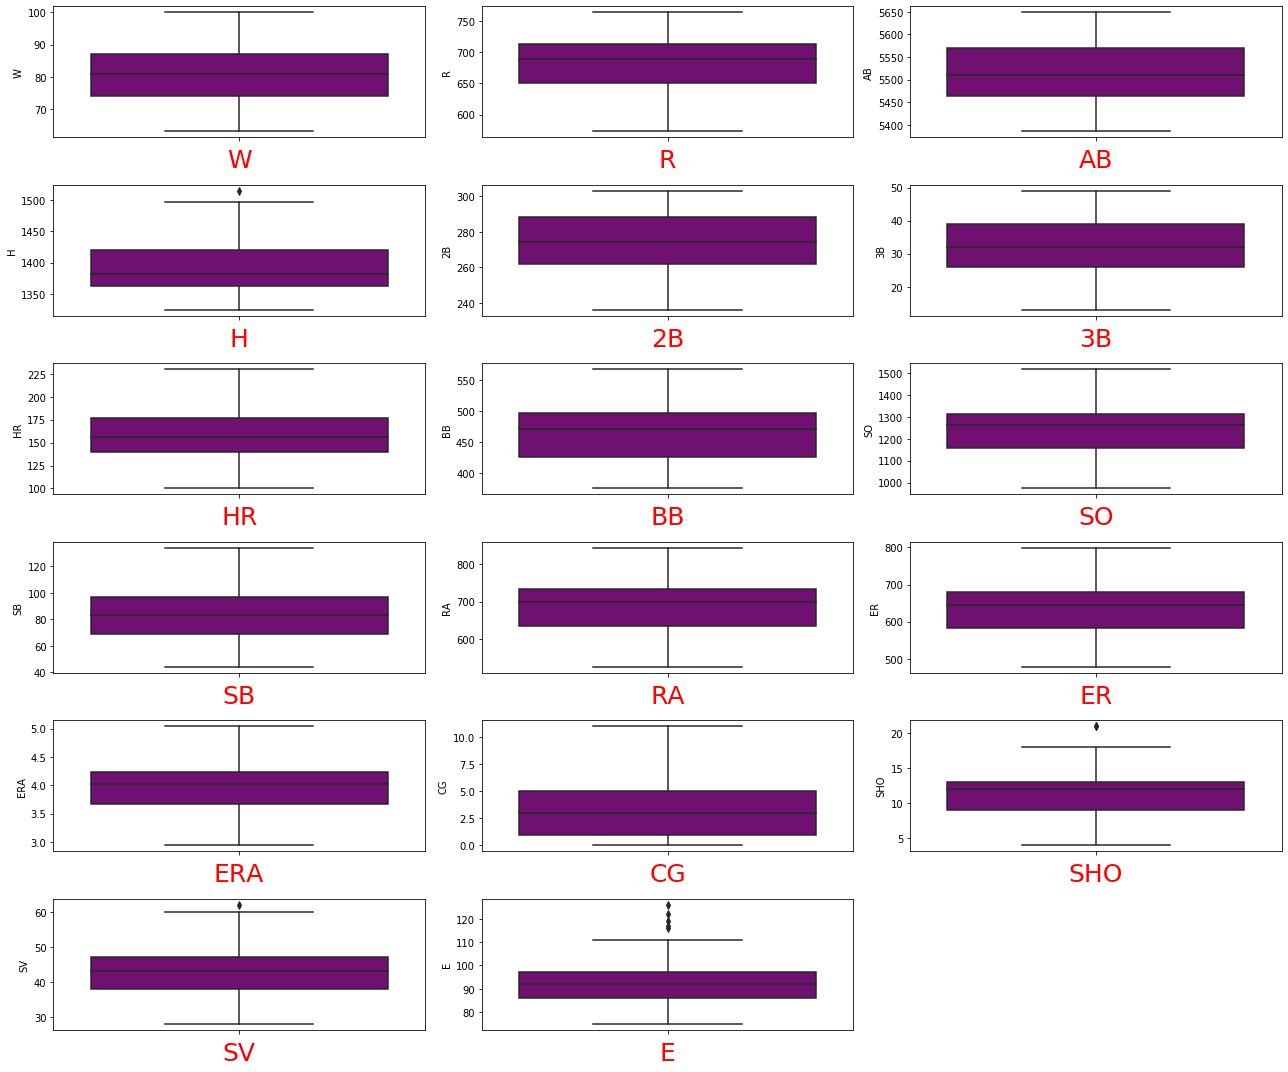

In [16]:
plt.figure(figsize=(18,15))
plotnumber = 1

for column in new_data:
    if plotnumber <= 17:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(y= new_data[column],color='purple',orient='h')
        plt.xlabel(column,fontsize = 25,color='red')
    plotnumber+=1
plt.tight_layout()

### we can see that there are till outliers in those columns: 'SV' , 'SHO',and 'E'
### Let's use the Quantiles techniques and see if we can remove them.

### Outlier Dectection Formula
### Higher side ===> Q3 + (1.5 * IQR)
### lower side ===> Q1 - (1.5 * IQR)
### IQR = Inter Quantile Rate = Q3 - Q1

### __We can see that all the outliers are from the high side ,that means after above maximum.__

In [101]:
## Find the IQR ( Inter Quantile Range) to identify outlier

# 1st quantile
q1 = new_data.quantile(0.25)

# 3rd quantile
q3 = new_data.quantile(0.75)

#IQR 
iqr = q3 - q1

### Let's remove outliers from these columns:'SV' , 'SHO',and 'E'.

In [102]:
high_SV = (q3.SV+ (1.5 * iqr.SV))
high_SV

60.5

### This means from the column SV all the records values greater than 60.5 (SV > 60.5) are Outliers.


#### Let's remove the Outliers.

In [103]:
## the get indexes of those records

indexes = np.where(new_data['SV'] > high_SV)
indexes

(array([14]),)

### We can see that in SV column only one record have values greater than 60.5

In [104]:
## verification
new_data['SV'].iloc[14]

62

In [106]:
## Let's drop index from the dataset

new_data = new_data.drop(new_data.index[indexes])

In [107]:
## reset the index
new_data.reset_index(drop=True)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [108]:
## 'SHO' column

indexes = np.where(new_data['SHO'] > (q3.SHO + (1.5 * iqr.SHO)))
new_data= new_data.drop(new_data.index[indexes])
new_data.reset_index(drop=True)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [109]:
### for 'E' column
indexes = np.where(new_data['E'] > (q3.E + (1.5 * iqr.E)))
new_data= new_data.drop(new_data.index[indexes])
new_data.reset_index(drop=True)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,86,729,5459,1363,278,26,230,486,1392,121,618,572,3.57,5,13,39,85


### Again let's check our new dataset if the outliers are removed



In [110]:
new_data.shape

(21, 17)

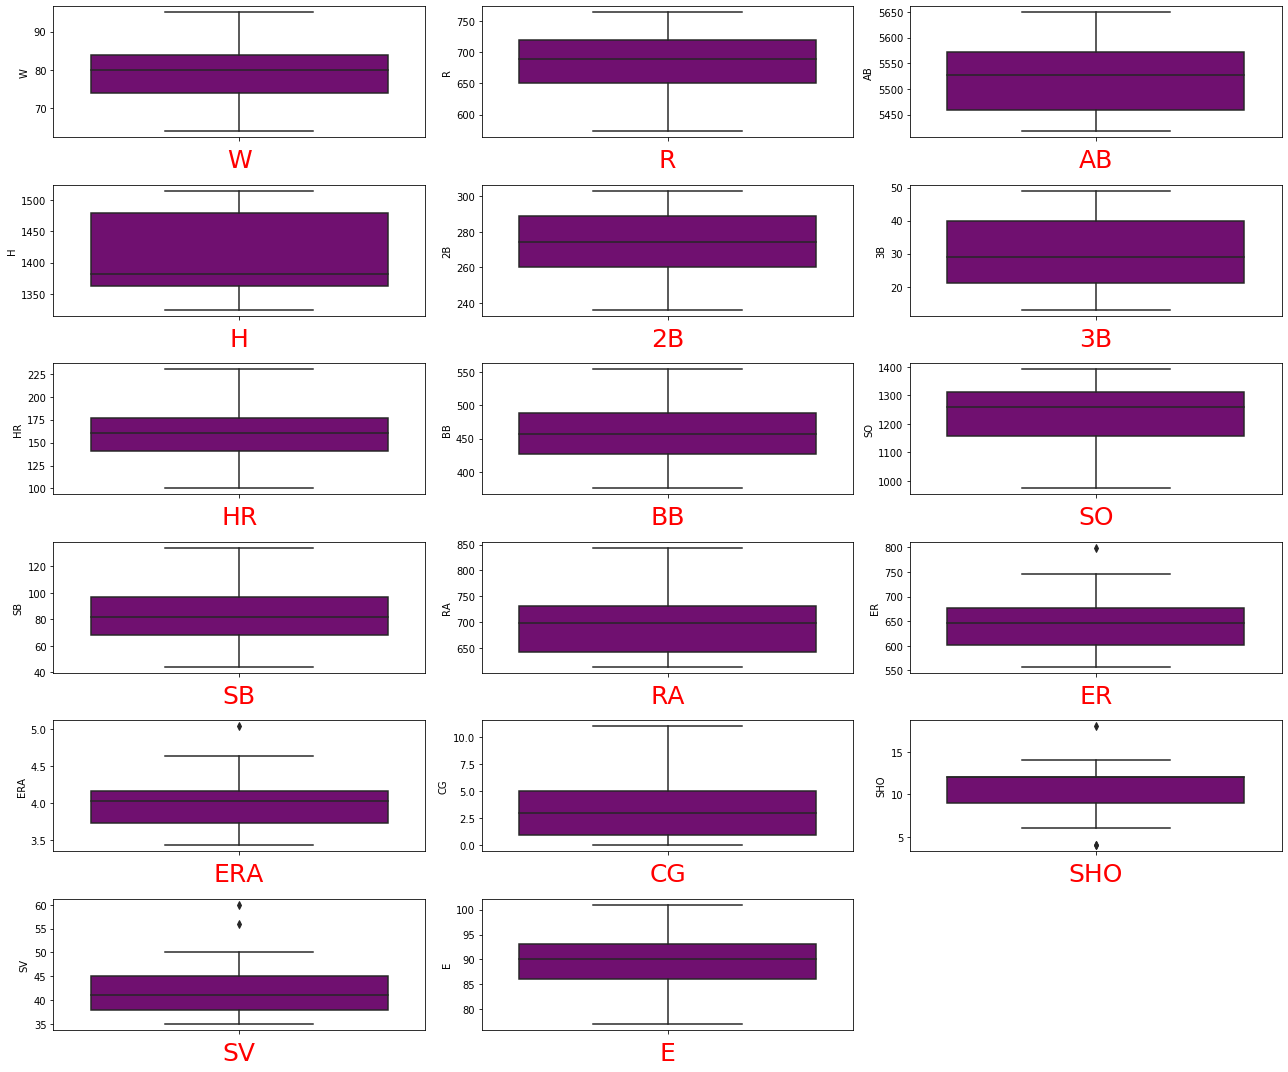

In [111]:
plt.figure(figsize=(18,15))
plotnumber = 1

for column in new_data:
    if plotnumber <= 17:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(y= new_data[column],color='purple',orient='h')
        plt.xlabel(column,fontsize = 25,color='red')
    plotnumber+=1
plt.tight_layout()

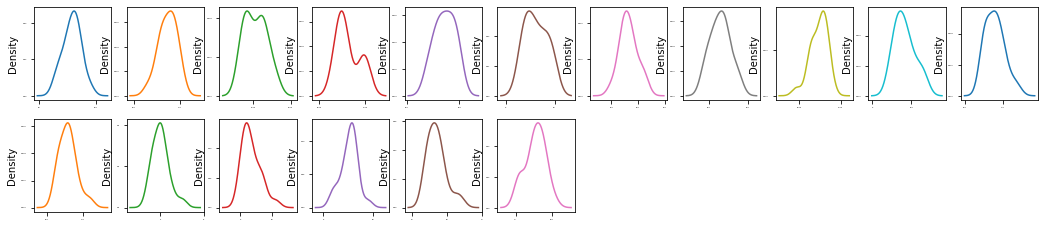

In [112]:
new_data.plot(kind='density',subplots=True,
          layout=(6,11),sharex=False,
          legend=False,fontsize='2',
          figsize =(18,12))
plt.show()

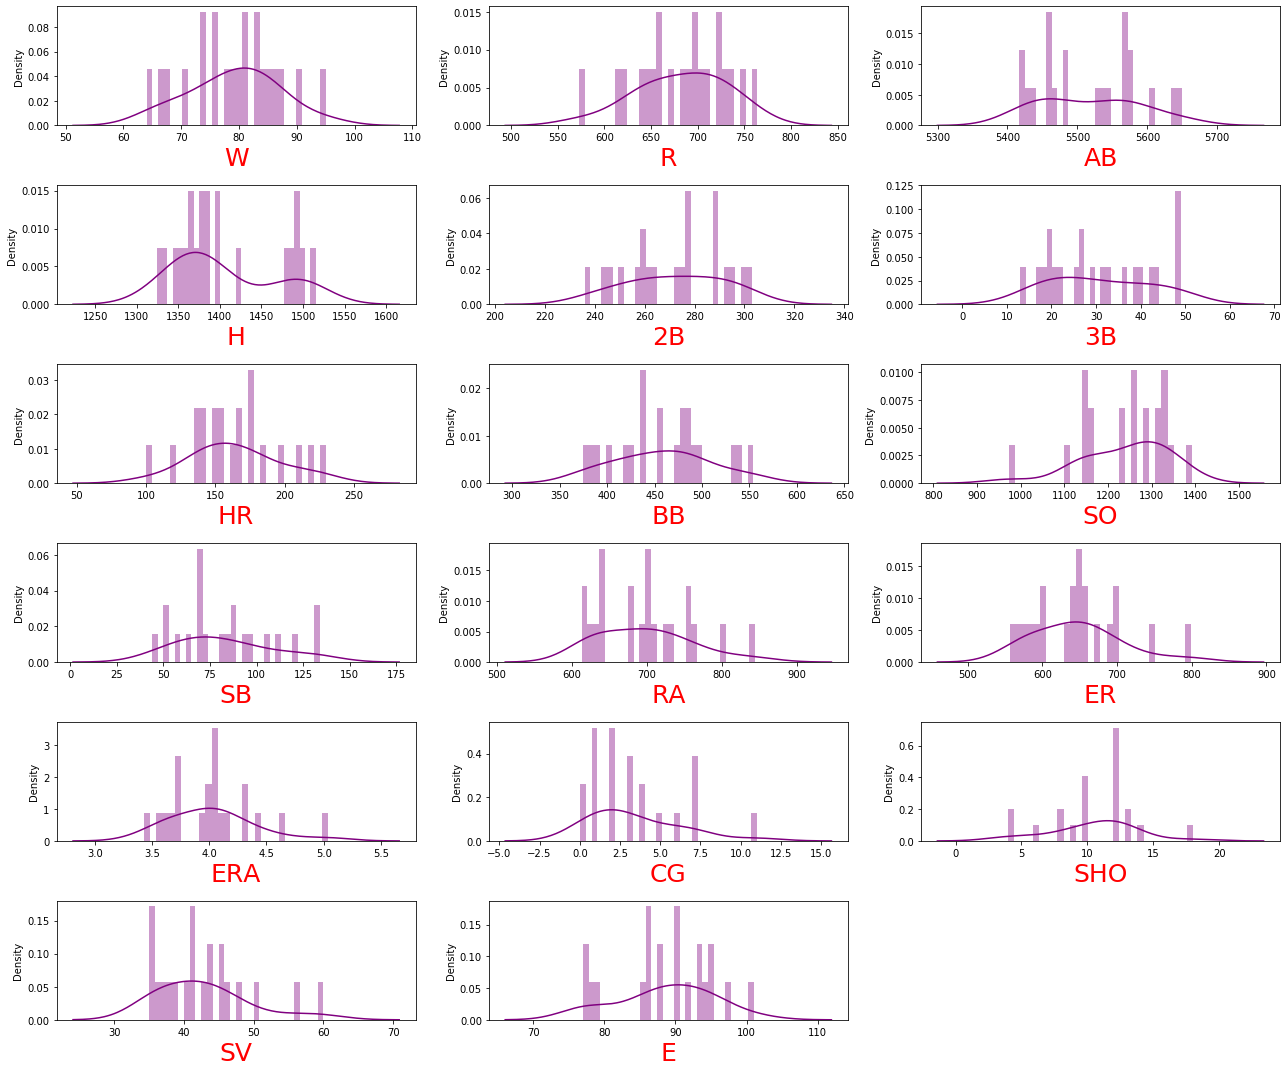

In [113]:
## plot a  distplot check the distribution

plt.figure(figsize=(18,15))
plotnumber = 1

for column in new_data:
    if plotnumber <= 17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(new_data[column],bins=30,color='purple')
        plt.xlabel(column,fontsize = 25,color='red')
    plotnumber+=1
plt.tight_layout()

### From these two graph we can see that the first outliers are remove and the skewness also a remove
### from the columns.

## __Plotting Heatmap (Correlation matrix)__

#### __Heatmap graph__

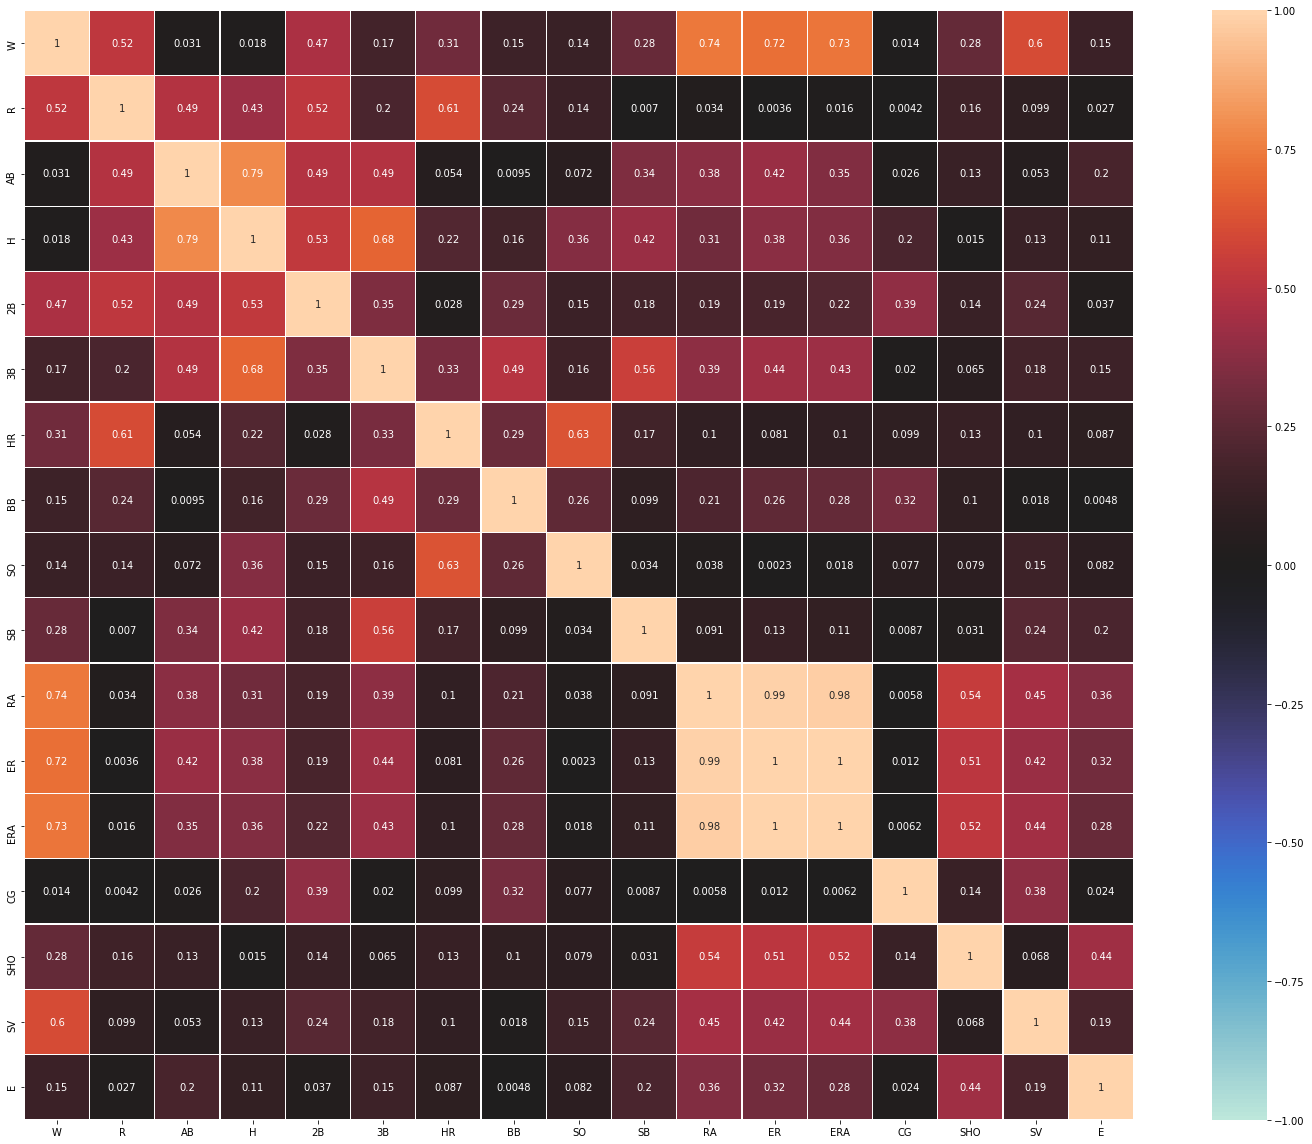

In [114]:
df_corr = new_data.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True,
           square=True,center=0,fmt='.2g',linewidths=.2,)
plt.tight_layout()

### From the heatmap graph we can see there are correlation between some columns


## Let's check for multicollinearity

In [117]:
## first let's seperate our dataset into features and label

X = new_data.drop('W',axis=1)
y = new_data.W

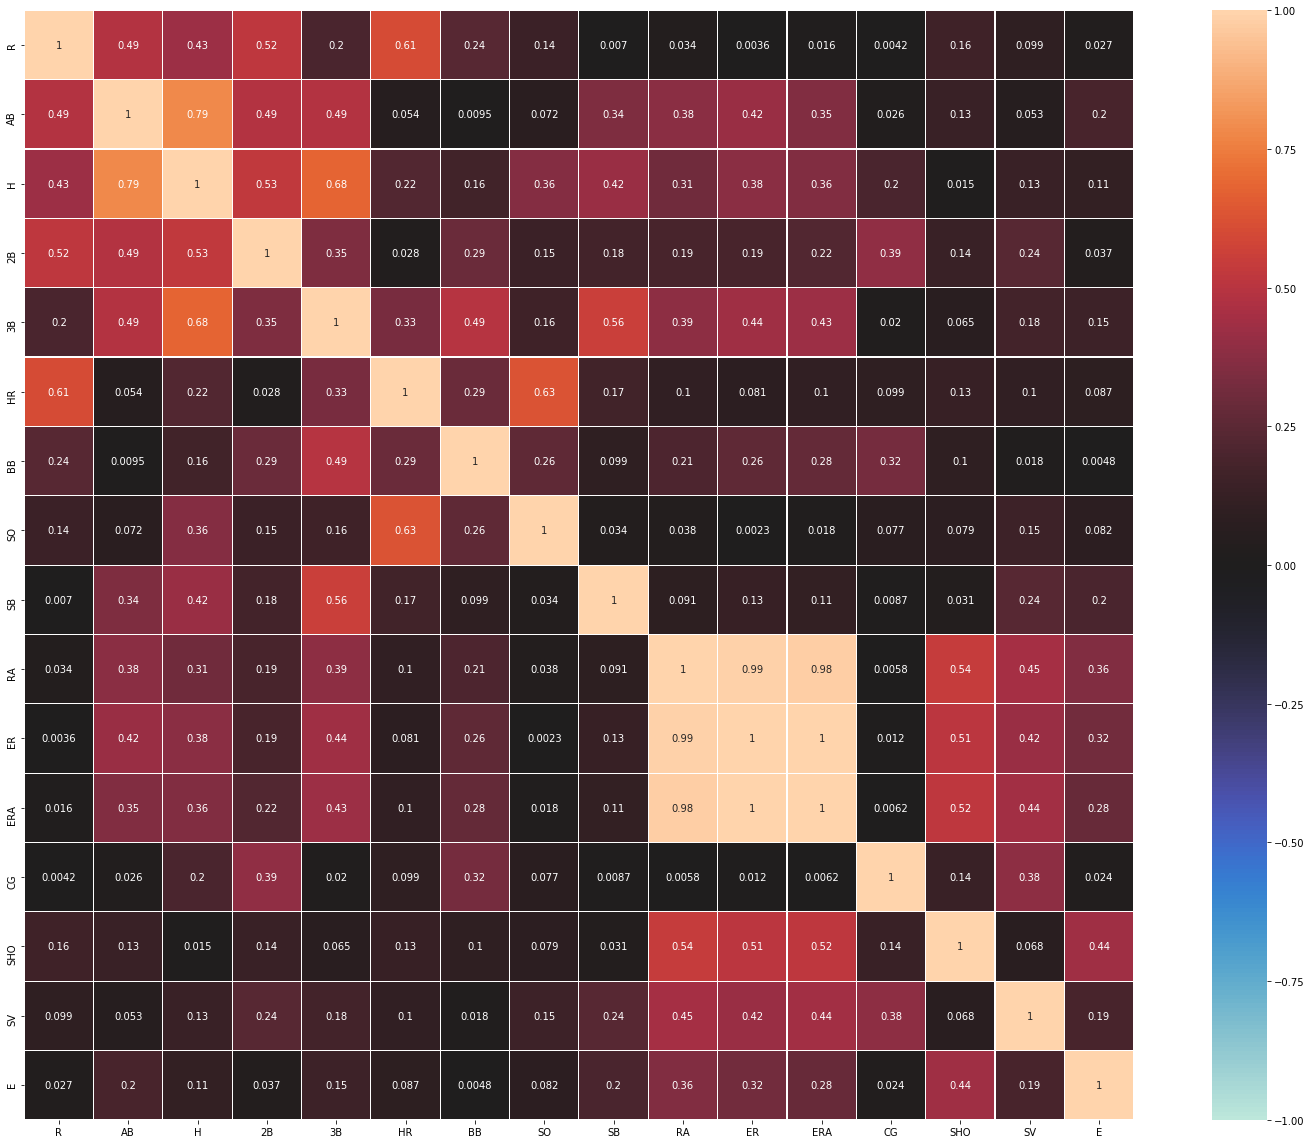

In [118]:
df_corr1 = X.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr1, vmin=-1, vmax=1, annot=True,
           square=True,center=0,fmt='.2g',linewidths=.2,)
plt.tight_layout()

### We can see that some features are higly correlated to each other. so let remove them.

In [120]:
#### with the following function we can select highly correlated features and it will
## be remove from the first feature that is correlated with anything other feature

def correletion(dataset, my_threshold):
    col_corr = set() # Set of all the names correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > my_threshold:  # we are interested in absoluted coefficient values
                col_name = corr_matrix.columns[i] ## getting the name of the column
                col_corr.add(col_name)
    return col_corr



In [121]:
correletion(X,0.70)

{'ER', 'ERA', 'H'}

## let's remove one and see.

In [122]:
new_data.drop('ER',axis=1,inplace=True)

## let's verify if the multicollinearity problem is solved.


In [123]:
X = new_data.drop('W',axis=1)
y = new_data.W

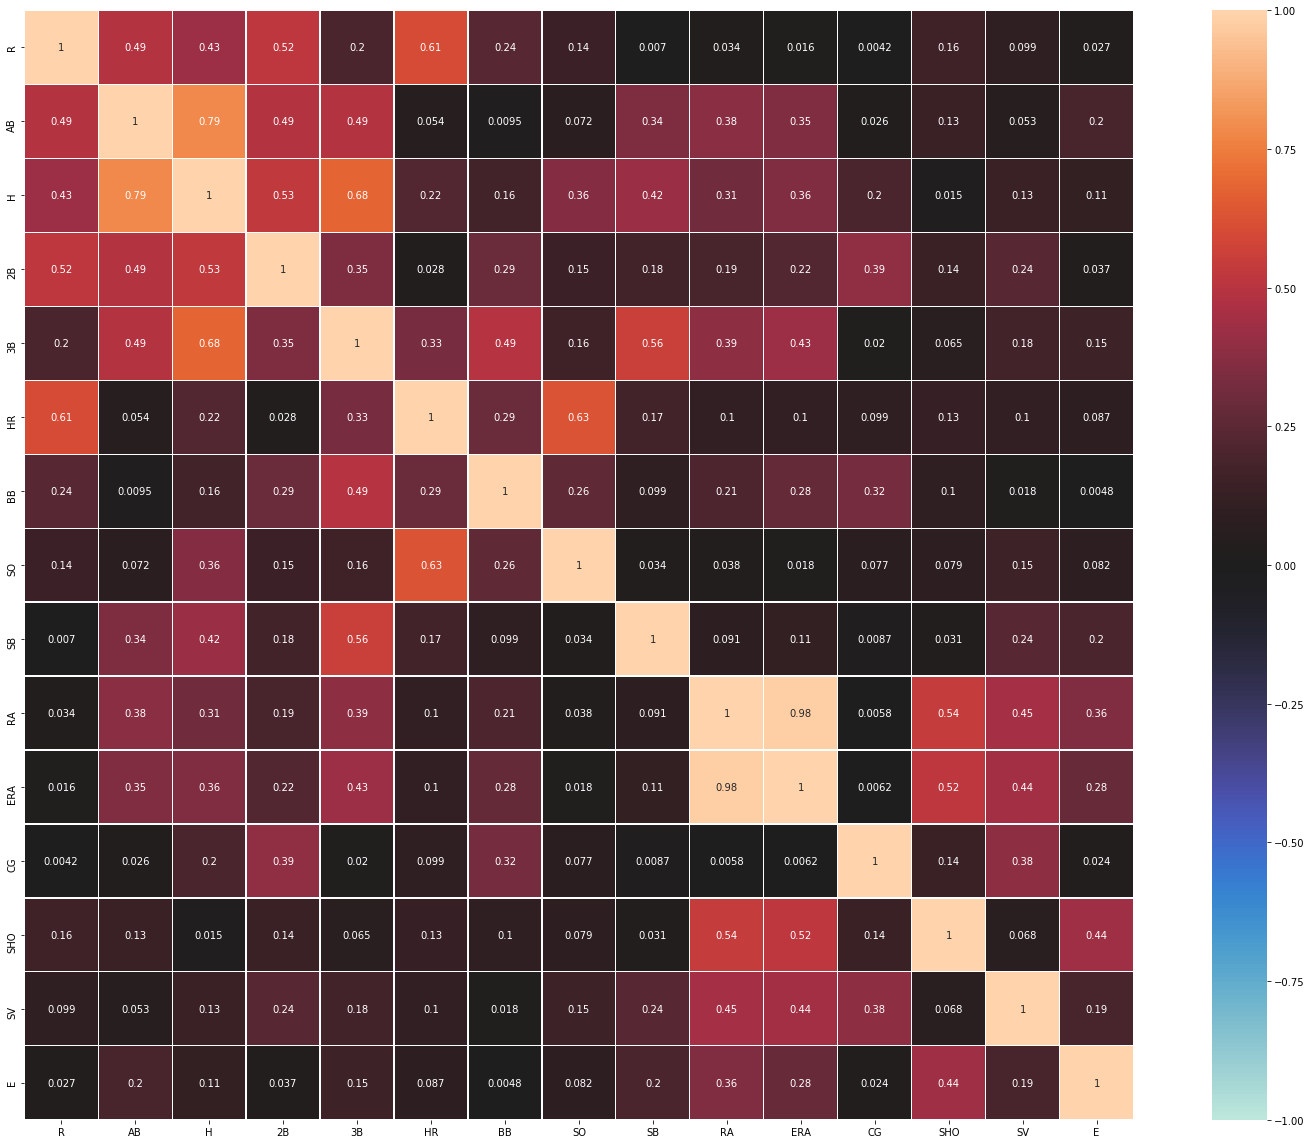

In [124]:
df_corr1 = X.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr1, vmin=-1, vmax=1, annot=True,
           square=True,center=0,fmt='.2g',linewidths=.2,)
plt.tight_layout()

## We can see that the multicollinearity problem is half solved.

In [125]:
new_data.shape

(21, 16)

### Our data set have 16 columns now..

## __Let's check the relationship between our feature columns and the target column by using Scatterplot().__

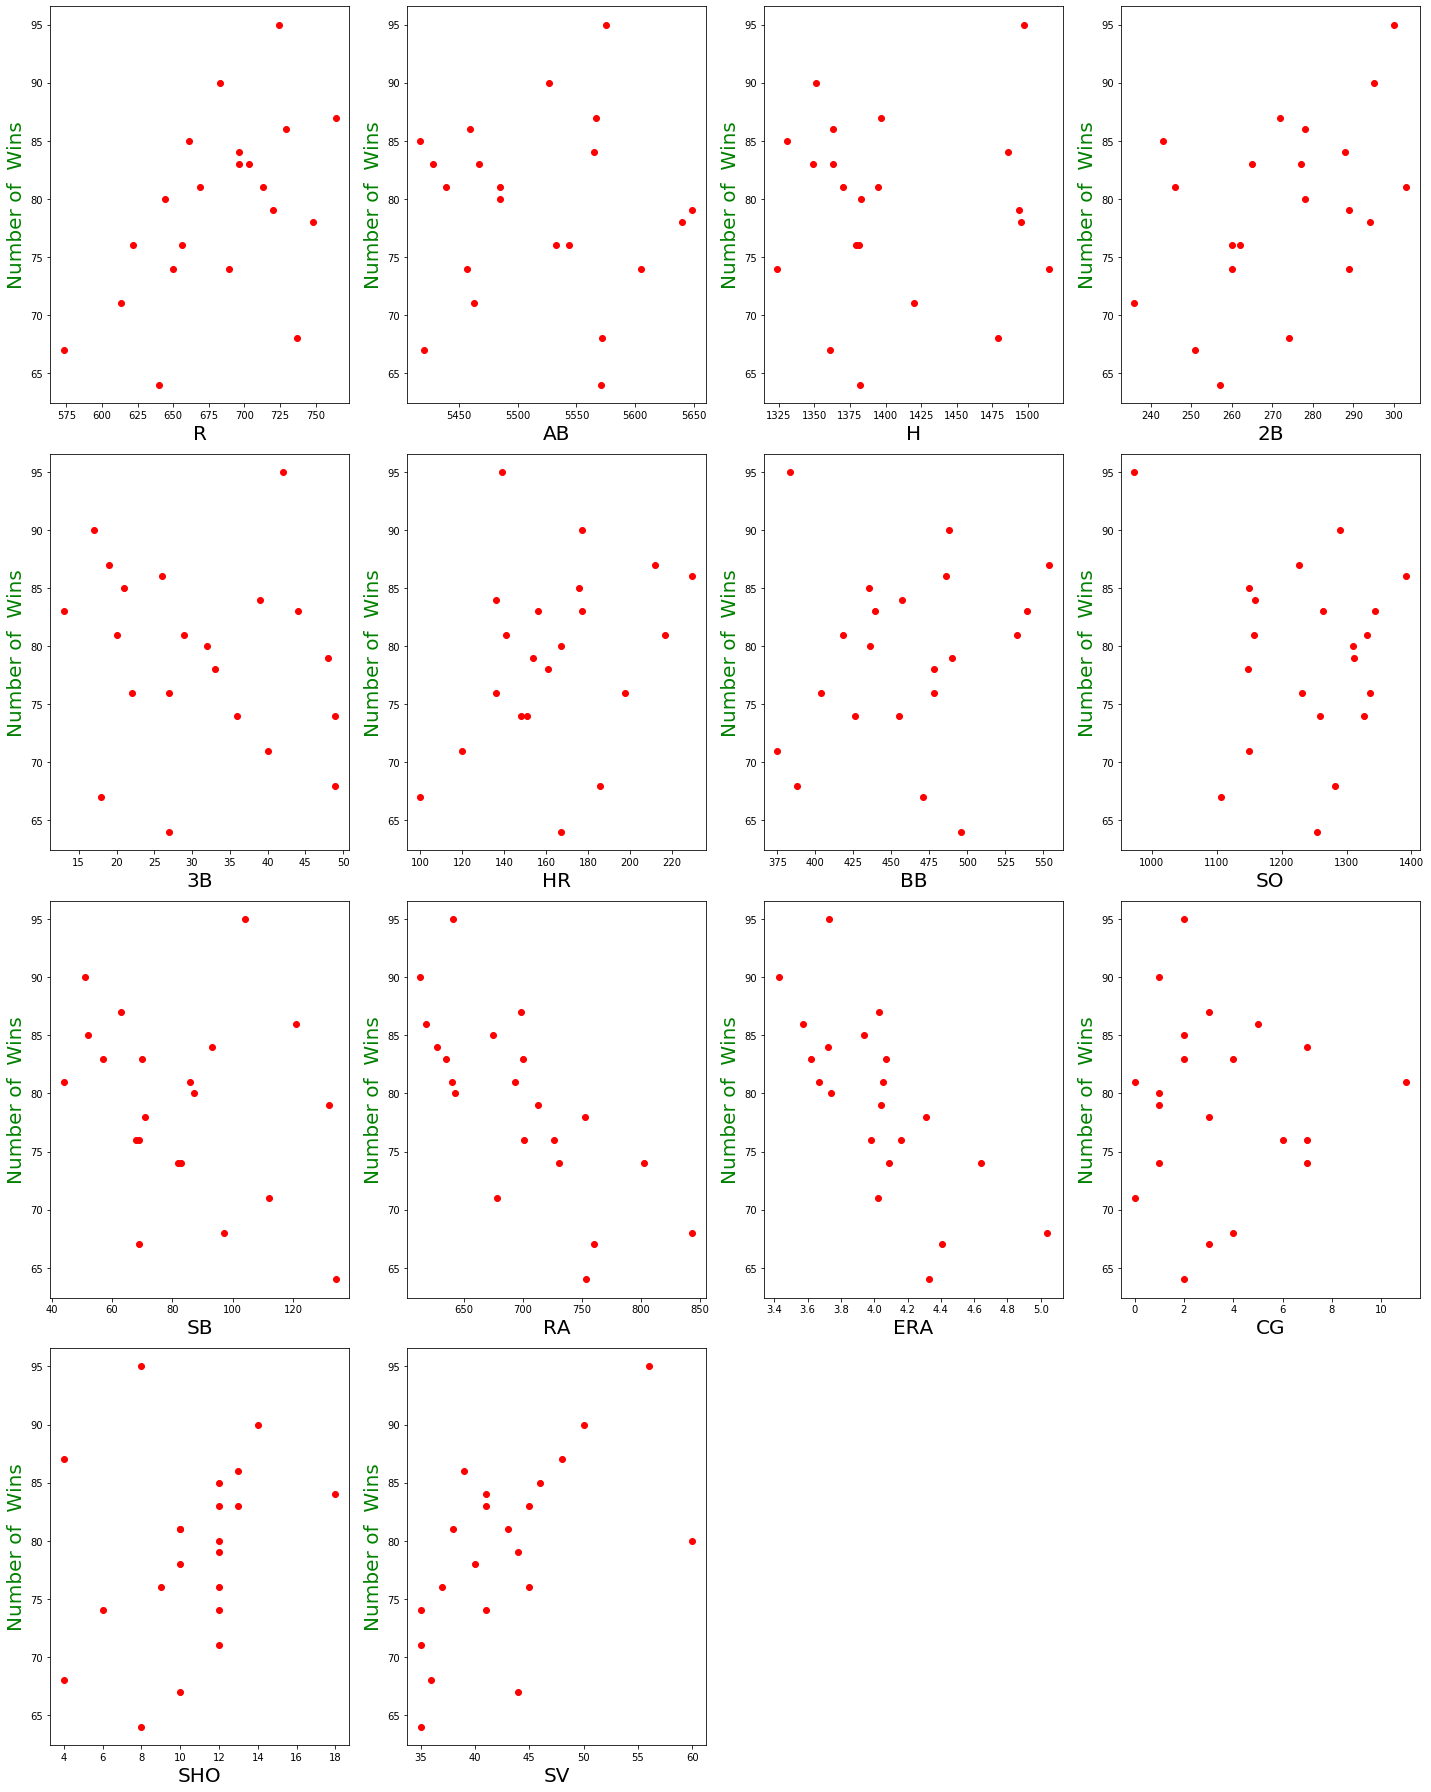

In [126]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber <= 14:
        ax = plt.subplot(4,4,plotnumber)
        plt.scatter(X[column],y, color ='red')
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Number of  Wins', fontsize = 20,color='green' )
        
    plotnumber+=1
plt.tight_layout()

## Great the relationship between the label and the features look fairly clear Linear,
## from the above scatter graph.Thus our linearity assumption is satisfied.

# __Let's build the first model using Linear Regression Algorithum and check the accury socre.__

In [127]:
## importing the libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error


In [128]:
## Standarization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [129]:
X_scaled

array([[ 0.87858855,  0.81938916,  1.52088474,  1.4585761 ,  0.98896918,
        -0.79886346, -1.53470776, -2.70627114,  0.82261392, -0.92637895,
        -0.80526742, -0.51571062, -0.7846902 ,  2.02703427, -0.08732875],
       [ 0.28750152, -0.72027497, -0.93848559,  0.25018458,  1.16878176,
        -0.26076109, -0.39674034,  0.26178753, -0.51530485,  0.04303281,
         0.11320053, -0.51571062,  0.45896974,  0.33661941, -0.39297938],
       [-0.28247527, -1.11944716, -0.1740867 ,  1.61619238, -0.17981258,
        -0.7355573 ,  1.51341926, -0.8295605 ,  0.11430398, -0.94280965,
        -0.96735   ,  2.7332663 , -0.16286023, -0.73909914, -1.46275658],
       [-1.27465707,  0.22063088, -0.40672984, -0.64297437, -0.35962516,
        -0.8938227 , -1.10796998, -0.07479644, -0.59400595,  0.05946351,
        -0.12992334,  1.28927656, -0.47377522, -0.89277322,  1.89940034],
       [ 0.13972976,  1.24707364,  1.81999735,  0.88064972,  1.61831321,
        -0.41902649, -0.07160679,  0.21078996, 

In [130]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.30, random_state=65)

### __Model Instantiating and training__

In [131]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [132]:
### train score 
reg.score(x_train, y_train)

1.0

In [133]:
## test encore

reg.score(x_test,y_test)

-0.5439364599559275

In [134]:
y_pred = reg.predict(x_test)

In [135]:
mae = mean_absolute_error(y_test,y_pred)

In [136]:
mae

7.837771757991919

In [52]:
from sklearn import metrics

In [137]:
print('\n*****Accuracy ****\n')

print(metrics.r2_score(y_test,y_pred))


*****Accuracy ****

-0.5439364599559275


## The can see that the scores and Accuracy are too low and we have high mean_absolute_error
## So let's go for feature Selection since we have 16 columns.

## let's got again with features selection using __PCA: Principal Component Analytist.__

In [138]:
from sklearn.decomposition import PCA

In [139]:
pca = PCA()


In [140]:
Y = pca.fit(X_scaled)

In [141]:
var_cumu =  np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 25.64029276,  43.78594234,  59.28197077,  70.1085011 ,
        79.3551321 ,  84.60601921,  89.33981334,  93.22689652,
        95.93972004,  97.56682454,  98.73700077,  99.39468729,
        99.88131546,  99.9717153 , 100.        ])

## from this verication we can see that with 8 features we can keep 96% of information

In [144]:
# let's print it.

k = np.argmax(var_cumu > 95)
print('Number of components explain 96% of variance is :',k)

Number of components explain 96% of variance is : 8


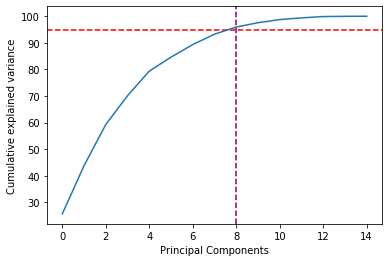

In [145]:
## let's also plot on a graph
plt.ylabel('Cumulative explained variance')
plt.xlabel('Principal Components')
plt.axvline(x=k,color='purple',linestyle ='--')
plt.axhline(y=95,color='red',linestyle ='--')
plt.plot(var_cumu)
plt.show()

In [146]:
pca = PCA(n_components=8)
new_pcomp = pca.fit_transform(X_scaled)
princi_comp = pd.DataFrame(new_pcomp,
        columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8'])
                                   
princi_comp
                                   
                                   

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
0,1.740832,2.128935,1.771407,3.316392,-0.655080,0.306726,1.159288,0.632428
1,-0.310721,-0.134750,0.422892,0.402035,0.680821,0.426476,-0.516527,0.696994
2,-0.820669,2.029455,1.261709,-2.431096,-1.814845,0.262543,1.428552,1.079614
3,0.038879,-1.696422,0.509960,-0.399879,-1.649917,-0.608114,-0.915899,0.961920
4,3.538208,0.342268,0.011496,-1.596157,-0.311154,0.680093,-1.207935,-0.141501
5,-0.451562,0.493458,-3.261658,0.824080,-1.069247,0.374720,1.647653,-0.591414
6,-1.716137,-0.935951,-1.137308,0.321557,2.025574,2.254691,0.048753,-0.385543
7,-1.515569,0.389997,0.246635,2.233161,0.239405,-1.502049,-1.045760,0.569693
8,2.464852,0.870134,-1.271979,0.647699,-1.361299,0.466243,-0.371945,-0.958833
9,-1.763775,1.751706,-1.252930,-1.494224,1.899767,-0.745470,0.493840,1.066453


## let's build our model.

In [147]:
x_train, x_test, y_train,y_test = train_test_split(princi_comp,y,test_size=0.25,random_state=100)


In [148]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [149]:
from sklearn.metrics import r2_score, mean_squared_error

In [150]:
y_pred = reg.predict(x_test)

## Model Evaluation.

In [157]:
mae_lreg = mean_absolute_error(y_test,y_pred)

In [158]:
print('\nThe Mean Absolute Erro of LinearRegression model is:',mae_lreg)


The Mean Absolute Erro of LinearRegression model is: 5.3080437936354885


In [159]:
## Models evaluation using Mean Square Error (MSE)

print('\nThe Mean Square Erro of LinearRegression model is:',mean_squared_error(y_test,y_pred))


The Mean Square Erro of LinearRegression model is: 42.58474938835971


#### __Let's build more models and select the best one.__

In [160]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV
from sklearn.ensemble import RandomForestRegressor


In [161]:
### instantiate the models

dt = DecisionTreeRegressor()
ada = AdaBoostRegressor()
rid = Ridge()
las = Lasso()
rfr = RandomForestRegressor()

In [162]:
dt.fit(x_train,y_train)
ada.fit(x_train,y_train)
rid.fit(x_train,y_train)
las.fit(x_train,y_train)
rfr.fit(x_train,y_train)
print('Models are accessfully fitted.!!!')

Models are accessfully fitted.!!!


In [163]:
dt_ypred = dt.predict(x_test)
ada_ypred = ada.predict(x_test)
rid_ypred = rid.predict(x_test)
las_ypred = las.predict(x_test)
rfr_pred = rfr.predict(x_test)
print('Models are accessfully predicted.!!!')

Models are accessfully predicted.!!!


### __Models Evaluation__

In [164]:
## Models evaluation using Mean Absolute Erro

dt_mae  = mean_absolute_error(y_test,dt_ypred)
ada_mae = mean_absolute_error(y_test,ada_ypred)
rid_mae = mean_absolute_error(y_test,rid_ypred)
las_mae = mean_absolute_error(y_test,las_ypred)
rfr_mae = mean_absolute_error(y_test,rfr_pred)

print('\n','-'*50)
print('\nThe Mean Absolute Erro of DecisionTreeRegressor model is:',dt_mae )
print('\nThe Mean Absolute Erro of AdaBoostRegressor model is:',ada_mae)
print('\nThe Mean Absolute Erro of Ridge model is:',rid_mae)
print('\nThe Mean Absolute Erro of Lasso model is:',las_mae)
print('\nThe Mean Absolute Erro of RandomForestRegressor model is:',rfr_mae)



 --------------------------------------------------

The Mean Absolute Erro of DecisionTreeRegressor model is: 7.166666666666667

The Mean Absolute Erro of AdaBoostRegressor model is: 4.533333333333334

The Mean Absolute Erro of Ridge model is: 4.465396137237732

The Mean Absolute Erro of Lasso model is: 1.6426578066380912

The Mean Absolute Erro of RandomForestRegressor model is: 4.486666666666667


### Here we can say that Lasso model has the smallest Mean Absolute Erro 

In [591]:
print('\n','-'*50)
print('\n','-'*50)


 --------------------------------------------------

 --------------------------------------------------


In [165]:
## Models evaluation using Mean Square Error (MSE)
print('\nThe Mean Square Erro of DecisionTreeRegressor model is:',mean_squared_error(y_test,dt_ypred))
print('\nThe Mean Square Erro of AdaBoostRegressor model is:',mean_squared_error(y_test,ada_ypred))
print('\nThe Mean Square Erro of Ridge model is:',mean_squared_error(y_test,rid_ypred))
print('\nThe Mean Square Erro of Lasso model is:',mean_squared_error(y_test,las_ypred))
print('\nThe Mean Square Erro of RandomForestRegressor model is:',mean_squared_error(y_test,rfr_pred))



The Mean Square Erro of DecisionTreeRegressor model is: 57.833333333333336

The Mean Square Erro of AdaBoostRegressor model is: 26.83259259259259

The Mean Square Erro of Ridge model is: 29.973122080840046

The Mean Square Erro of Lasso model is: 4.942201061120249

The Mean Square Erro of RandomForestRegressor model is: 29.00383333333335


### Here we can say that Lasso model has the smallest Mean Square Erro  Erro

### __We can see here that Lasso model have the smallest Mean Absolute Erro(MAE = 1.64) and  MSE = 4.9 (Mean Absolute Error= 4.9 ) among these 6 models. SO we can say that is our best model.__

Text(0.5, 1.0, 'Actual VS Predicted')

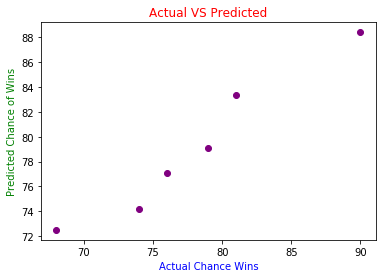

In [166]:
plt.scatter(y_test,las_ypred,color ='purple')
plt.xlabel('Actual Chance Wins',color='blue')
plt.ylabel('Predicted Chance of Wins',color='green')
plt.title('Actual VS Predicted',color='r')


## We can see that Losso model give a great linear relationship our data.

In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [170]:
lass_reg= LassoCV(cv=5, random_state=64,max_iter=5000).fit(x_train, y_train)


In [171]:
y_lasso_pred = lass_reg.predict(x_test)

In [172]:
lass_mae1 = mean_absolute_error(y_test,y_lasso_pred)
print('\nThe Mean Absolute Erro of Lasso model post turning is:',lass_mae1)
print('\n','-'*50)
print('\nThe Mean Square Erro of Lasso model  post turning is:',mean_squared_error(y_test,y_lasso_pred ))


The Mean Absolute Erro of Lasso model post turning is: 3.7396279862927764

 --------------------------------------------------

The Mean Square Erro of Lasso model  post turning is: 20.855023779247688


### After Hypyer parameter turning we are no able to to reduce the errors.
### So let's save our  best model. "las " ,Mean Absolute Erro(MAE = 1.64) and MSE = 4.9 (Mean Absolute Error= 4.9 )

In [173]:
import joblib
joblib.dump(las,"Baseball_Win_Predict_Model.pkl")

['Baseball_Win_Predict_Model.pkl']